In [ ]:
import torch # Import PyTorch library for tensor operations and machine learning.
import torch.nn as nn # Import neural network module for building models.
import torch.optim as optim # Import optimization algorithms for training models.
from torchvision import datasets, transforms # Import torchvision for datasets and transformations.
from torch.utils.data import DataLoader  # Import DataLoader to handle batch processing of datasets.
import matplotlib.pyplot as plt  # Import Matplotlib for plotting data visualizations.
from sklearn.metrics import confusion_matrix, classification_report  # Import metrics for evaluation.
import seaborn as sns  # Import Seaborn for creating enhanced data visualizations.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Check if GPU is available, else use CPU.
print(f"Using device: {device}")  # Display the device being used for computations.

Using device: cpu


In [ ]:
train_transform = transforms.Compose([  # Create a pipeline of transformations for training data.
    transforms.RandomHorizontalFlip(), # Randomly flip the image horizontally for data augmentation.
    transforms.RandomCrop(32, padding=4),  # Randomly crop the image with padding for better generalization.
    transforms.ToTensor(), # Convert the image to a tensor for input to the neural network.
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize the image values to a range of [-1, 1].
])

test_transform = transforms.Compose([ # Create a pipeline of transformations for test data.
    transforms.ToTensor(), # Convert the image to a tensor for input to the neural network.
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image values to a range of [-1, 1].
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transform) # Load CIFAR-10 training dataset with the specified transformations.
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=test_transform) # Load CIFAR-10 test dataset with the specified transformations.

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True) # Create a DataLoader for the training dataset, shuffle for better training randomness.
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False) # Create a DataLoader for the test dataset, no shuffle as we don't need randomness for evaluation.

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# LeNet Model
import torch # PyTorch library for tensor operations and neural network building
import torch.nn as nn # PyTorch module for defining neural network layers

# Define LeNet class
class LeNet(nn.Module):  # LeNet class inherits from nn.Module to define a neural network
    def __init__(self, num_classes=10): # Constructor to initialize the network
        super(LeNet, self).__init__() # Inherit properties from nn.Module

        # Define layers for feature extraction using sequential model
        self.features = nn.Sequential( # Sequential container for convolutional and pooling layers
            nn.Conv2d(3, 6, kernel_size=5),  # First convolutional layer with 3 input channels (RGB), 6 output channels, and 5x5 kernel
            nn.ReLU(),                       # ReLU activation function for non-linearity
            nn.AvgPool2d(kernel_size=2, stride=2),  # Average pooling with 2x2 kernel and stride 2


            nn.Conv2d(6, 16, kernel_size=5), # Second convolutional layer with 6 input channels and 16 output channels
            nn.ReLU(),  # ReLU activation function
            nn.AvgPool2d(kernel_size=2, stride=2)  # Second pooling layer with 2x2 kernel and stride 2
          )
        # Define layers for classification using fully connected layers
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),  # Sequential container for fully connected layers
            nn.ReLU(),  # First fully connected layer, input size based on flattened feature map, output size is 120

            nn.Linear(120, 84),   # Second fully connected layer, input size is 120, output size is 84
            nn.ReLU(),   # ReLU activation function
            nn.Linear(84, num_classes)   # Output layer with size equal to the number of classes (10 for CIFAR-10)
        )

    def forward(self, x): # Define the forward pass through the network
        x = self.features(x) # Pass the input through the feature extraction layers
        x = x.view(x.size(0), -1)  # Flatten the tensor to feed into the fully connected layers
        x = self.classifier(x)  # Pass the flattened tensor through the fully connected layers
        return x # Return the output of the network

# Create an instance of the LeNet model and specify the number of output classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set device to GPU if available, otherwise CPU
model = LeNet(num_classes=10).to(device)  # Instantiate the LeNet model and move it to the selected device

# Print the model architecture
print(model) # Output the model summary to verify the layers and parameters

# Below is another LeNet5 implementation with similar structure (note: `LeNet5` seems to be duplicated, same as LeNet)
import torch # Importing PyTorch library
import torch.nn as nn # Importing nn module for building neural networks

# Define LeNet5 class (a variation of LeNet)
class LeNet5(nn.Module):  # LeNet5 class inherits from nn.Module to define a neural network
    def __init__(self, num_classes=10):  # Constructor to initialize the network
        super(LeNet, self).__init__() # Inherit properties from nn.Module

         # Define layers for feature extraction using sequential model
        self.features = nn.Sequential(  # Sequential container for convolutional and pooling layers
            nn.Conv2d(3, 6, kernel_size=5),  # First convolutional layer with 3 input channels (RGB), 6 output channels, and 5x5 kernel
            nn.ReLU(),     # ReLU activation function for non-linearity
            nn.AvgPool2d(kernel_size=2, stride=2), # Average pooling with 2x2 kernel and stride 2

            nn.Conv2d(6, 16, kernel_size=5), # Second convolutional layer with 6 input channels and 16 output channels
            nn.ReLU(),  # ReLU activation function
            nn.AvgPool2d(kernel_size=2, stride=2)   # Second pooling layer with 2x2 kernel and stride 2
        )

        # Define layers for classification using fully connected layers
        self.classifier = nn.Sequential(  # Sequential container for fully connected layers
            nn.Linear(16 * 5 * 5, 120),  # First fully connected layer, input size based on flattened feature map, output size is 120
            nn.ReLU(),    # ReLU activation function

            nn.Linear(120, 84),  # Second fully connected layer, input size is 120, output size is 84
            nn.ReLU(),   # ReLU activation function

            nn.Linear(84, num_classes)  # Output layer with size equal to the number of classes (10 for CIFAR-10)
        )

    def forward(self, x):  # Define the forward pass through the network
        x = self.features(x) # Pass the input through the feature extraction layers
        x = x.view(x.size(0), -1)  # Flatten the tensor to feed into the fully connected layers
        x = self.classifier(x)  # Pass the flattened tensor through the fully connected layers
        return x # Return the output of the network

# Create an instance of the LeNet5 model and specify the number of output classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set device to GPU if available, otherwise CPU
model = LeNet(num_classes=10).to(device) # Instantiate the LeNet5 model and move it to the selected device

# Print the model architecture
print(model)  # Output the model summary to verify the layers and parameters


Epoch 1/10, Training Loss: 1.8056, Test Loss: 1.5250, Test Accuracy: 43.28%
Epoch 2/10, Training Loss: 1.5474, Test Loss: 1.4112, Test Accuracy: 48.95%
Epoch 3/10, Training Loss: 1.4528, Test Loss: 1.3495, Test Accuracy: 51.06%
Epoch 4/10, Training Loss: 1.3970, Test Loss: 1.2872, Test Accuracy: 52.93%
Epoch 5/10, Training Loss: 1.3598, Test Loss: 1.2447, Test Accuracy: 55.33%
Epoch 6/10, Training Loss: 1.3216, Test Loss: 1.2189, Test Accuracy: 56.30%
Epoch 7/10, Training Loss: 1.2937, Test Loss: 1.2029, Test Accuracy: 56.87%
Epoch 8/10, Training Loss: 1.2646, Test Loss: 1.1715, Test Accuracy: 57.43%
Epoch 9/10, Training Loss: 1.2330, Test Loss: 1.1262, Test Accuracy: 59.51%
Epoch 10/10, Training Loss: 1.2156, Test Loss: 1.1462, Test Accuracy: 58.78%


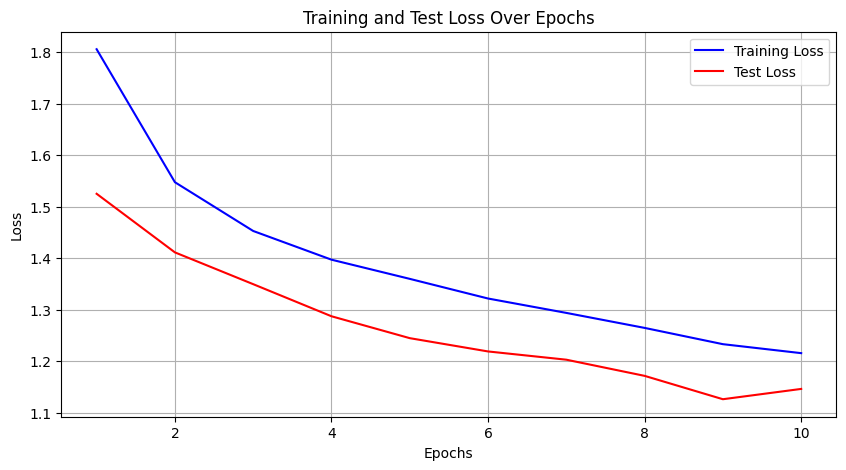

In [ ]:
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs
import torch   # PyTorch library for tensor operations
import torch.nn as nn # PyTorch module for defining neural networks
import torch.optim as optim  # PyTorch module for optimizers

# Function to train the model for one epoch
def train_one_epoch(model, criterion, optimizer, train_loader, device):
    """Train the model for one epoch."""# Function description
    model.train()   # Set the model to training mode
    running_loss = 0.0 # Initialize running loss

    # Iterate through batches in the training set
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device) # Move data to the specified device (GPU or CPU)

        optimizer.zero_grad()  # Zero the gradients of the model parameters

        # Perform forward pass through the model
        outputs = model(images) # Get model predictions
        loss = criterion(outputs, labels) # Calculate the loss based on the predictions and ground truth labels

        loss.backward()# Perform backward pass to compute gradients
        optimizer.step() # Update the model parameters based on computed gradients

        # Accumulate the loss for monitoring
        running_loss += loss.item() # Add the current batch loss to the running total

    # Return average loss for the epoch
    return running_loss / len(train_loader)

# Function to evaluate the model on the test set
def evaluate_model(model, criterion, test_loader, device):
    """Evaluate the model on the test set.""" # Function description
    model.eval()  # Set the model to evaluation mode (turn off dropout, batch norm)
    test_loss = 0.0  # Initialize test loss
    correct = 0  # Initialize correct predictions counter
    total = 0  # Initialize total samples counter

    # Disable gradient calculation during evaluation (saves memory)
    with torch.no_grad():
       # Iterate through batches in the test set
        for images, labels in test_loader: # Move data to device
            images, labels = images.to(device), labels.to(device) # Move data to device

            # Perform forward pass through the model
            outputs = model(images) # Get model predictions
            loss = criterion(outputs, labels)  # Calculate the loss for the current batch
            test_loss += loss.item() # Add the current batch loss to total test loss

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1) # Get predicted class with highest probability
            total += labels.size(0) # Add the batch size to total samples
            correct += (predicted == labels).sum().item() # Count correct predictions

    accuracy = 100 * correct / total # Calculate accuracy as percentage
    return test_loss / len(test_loader), accuracy  # Return average loss and accuracy

# Function to plot training and test losses over epochs
def plot_losses(train_losses, test_losses, num_epochs):
    """Plot training and test losses.""" # Function description

    plt.figure(figsize=(10, 5)) # Create a figure with specific size for the plot
    plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss", color="blue")  # Plot training loss
    plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss", color="red")  # Plot test loss
    plt.xlabel("Epochs")  # Label for x-axis (epochs)
    plt.ylabel("Loss")  # Label for y-axis (loss value)
    plt.title("Training and Test Loss Over Epochs") # Title for the plot
    plt.legend()  # Show legend to differentiate training and test loss
    plt.grid(True)  # Show grid lines on the plot
    plt.show()  # Display the plot

# Define the loss function (CrossEntropyLoss for multi-class classification)
criterion = nn.CrossEntropyLoss()
# Define the optimizer (Adam optimizer for updating model weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate set to 0.001
num_epochs = 10 # Define number of epochs for training

# Initialize lists to track losses over epochs
train_losses = []  # List to store training losses
test_losses = []  # List to store test losses

# Loop through each epoch
for epoch in range(1, num_epochs + 1):
    train_loss = train_one_epoch(model, criterion, optimizer, train_loader, device)  # Train for one epoch
    test_loss, test_accuracy = evaluate_model(model, criterion, test_loader, device) # Evaluate model on test data

    # Record training and test losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Print summary for the current epoch
    print(f"Epoch {epoch}/{num_epochs}, " # Print epoch number
          f"Training Loss: {train_loss:.4f}, "   # Print training loss
          f"Test Loss: {test_loss:.4f}, " # Print test loss
          f"Test Accuracy: {test_accuracy:.2f}%") # Print test accuracy

# Plot the losses over all epochs
plot_losses(train_losses, test_losses, num_epochs) # Call the function to plot the losses


In [ ]:
correct = 0  # Initialize variable to count correct predictions
total = 0  # Initialize variable to count total predictions

# Initializes lists to store predictions and true labels.
predictions = [] # List to store predicted labels
true_labels = [] # List to store true labels

# Disables gradient computation for evaluation.
with torch.no_grad():
    # Loops through batches of test data.
    for images, labels in test_loader:
        # Moves the images and labels to the specified device.
        images, labels = images.to(device), labels.to(device)

        # Passes the images through the model to get predictions.
        outputs = model(images)

        # Gets the predicted class with the highest score for each image.
        _, predicted = torch.max(outputs.data, 1)

        # Updates the total number of labels.
        total += labels.size(0)

        # Counts the number of correct predictions.
        correct += (predicted == labels).sum().item()

        # Stores the predictions and true labels for confusion matrix generation.
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculates the overall accuracy on the test set.
accuracy = 100 * correct / total  # Percentage accuracy calculation
print(f"Accuracy of the model on the test set: {accuracy:.2f}%") # Prints accuracy result

Accuracy of the model on the test set: 58.78%


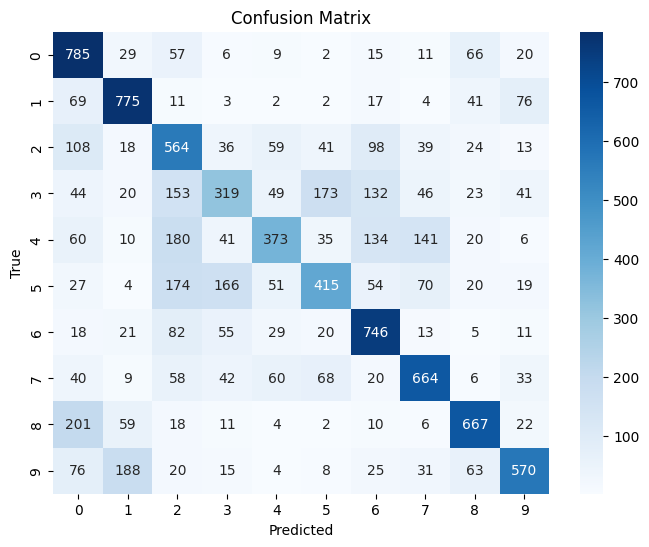

In [ ]:
# Confusion Matrix
import numpy as np # Import NumPy for numerical operations
import seaborn as sns # Import seaborn for plotting heatmaps
from sklearn.metrics import confusion_matrix # Import confusion_matrix function from sklearn
import matplotlib.pyplot as plt # Import matplotlib for plotting

def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    """Plot the confusion matrix."""  # Function to plot confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)  # Compute confusion matrix from true and predicted labels
    plt.figure(figsize=(8, 6))  # Create a figure of specific size for better readability
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names) # Plot the heatmap of confusion matrix with annotations and custom color map
    plt.xlabel("Predicted") # Set x-axis label
    plt.ylabel("True") # Set y-axis label
    plt.title("Confusion Matrix") # Set title for the plot
    plt.show()  # Display the plot

all_true_labels = []  # Initialize an empty list to store all true labels
all_predicted_labels = []  # Initialize an empty list to store all predicted labels

# Switch model to evaluation mode
model.eval()  # Set the model to evaluation mode (disables dropout, batch norm, etc.)

with torch.no_grad(): # Disable gradient computation for evaluation
    for images, labels in test_loader:  # Iterate through the test data loader
        images, labels = images.to(device), labels.to(device)   # Move images and labels to the specified device

        # Forward pass
        outputs = model(images)  # Pass the images through the model to get the outputs

        # Get predictions
        _, predicted = torch.max(outputs, 1) # Get the index of the maximum value (predicted class)

        # Collect true and predicted labels
        all_true_labels.extend(labels.cpu().numpy()) # Store true labels (move to CPU and convert to NumPy)
        all_predicted_labels.extend(predicted.cpu().numpy())  # Store predicted labels (move to CPU and convert to NumPy)

# Define class names (if you have specific names for your classes, replace this list)
class_names = [str(i) for i in range(10)]   # For 10 classes, create class names from 0 to 9

# Plot the confusion matrix
plot_confusion_matrix(all_true_labels, all_predicted_labels, class_names) # Call the function to plot the confusion matrix


In [ ]:
#classfication report without sklearn:
def compute_classification_report(actual_labels, predicted_labels, num_classes=10):
    # Initialize confusion matrix
    confusion_matrix = [[0 for _ in range(num_classes)] for _ in range(num_classes)]  # Create a confusion matrix of zeros

    # Populate confusion matrix
    for i in range(len(actual_labels)): # Loop through each label in the actual labels
        true_label = int(actual_labels[i]) # Get the true label for current instance
        pred_label = int(predicted_labels[i]) # Get the predicted label for current instance
        confusion_matrix[true_label][pred_label] += 1  # Increment the appropriate entry in the confusion matrix

    # Initialize metrics
    precision = [0] * num_classes  # Initialize a list for precision values for each class
    recall = [0] * num_classes # Initialize a list for recall values for each class
    f1_score = [0] * num_classes # Initialize a list for F1 score values for each class

    # Calculate metrics for each class
    for cls in range(num_classes): # Loop through each class
        tp = confusion_matrix[cls][cls] # True positives for the current class
        fp = sum(confusion_matrix[row][cls] for row in range(num_classes)) - tp # False positives
        fn = sum(confusion_matrix[cls]) - tp # False negatives

        # Precision: TP / (TP + FP)
        precision[cls] = tp / (tp + fp) if (tp + fp) > 0 else 0.0  # Calculate precision for the current class

        # Recall: TP / (TP + FN)
        recall[cls] = tp / (tp + fn) if (tp + fn) > 0 else 0.0 # Calculate recall for the current class

        # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
        f1_score[cls] = (
            2 * precision[cls] * recall[cls] / (precision[cls] + recall[cls])
            if (precision[cls] + recall[cls]) > 0
            else 0.0
        )  # Calculate F1 score for the current class

    # Calculate macro-averages
    macro_precision = sum(precision) / num_classes # Calculate the average precision across all classes
    macro_recall = sum(recall) / num_classes # Calculate the average recall across all classes
    macro_f1 = sum(f1_score) / num_classes # Calculate the average F1 score across all classes

    # Display the classification report
    print("Class\tPrecision\tRecall\t\tF1-Score")  # Print the header for the report
    for cls in range(num_classes):  # Loop through each class and display the metrics
        print(f"{cls}\t{precision[cls]:.2f}\t\t{recall[cls]:.2f}\t\t{f1_score[cls]:.2f}") # Print precision, recall, and F1 score for each class

    print("\nMacro-Average Metrics:") # Print the macro-average metrics
    print(f"Precision: {macro_precision:.2f}") # Print the average precision
    print(f"Recall: {macro_recall:.2f}") # Print the average recall
    print(f"F1-Score: {macro_f1:.2f}") # Print the average F1 score

    return precision, recall, f1_score, macro_precision, macro_recall, macro_f1# Return the calculated metrics


# Example usage
true_labels = [0, 1, 2, 1, 0, 2, 1, 2, 0, 2] # Replace with your actual labels (true values)
predictions = [0, 1, 1, 1, 0, 2, 0, 2, 2, 2] # Replace with your predicted labels

# Call the function to compute the classification report
precision, recall, f1_score, macro_precision, macro_recall, macro_f1 = compute_classification_report(
    true_labels, predictions, num_classes=10 # Specify number of classes (default is 10)
)


Class	Precision	Recall		F1-Score
0	0.67		0.67		0.67
1	0.67		0.67		0.67
2	0.75		0.75		0.75
3	0.00		0.00		0.00
4	0.00		0.00		0.00
5	0.00		0.00		0.00
6	0.00		0.00		0.00
7	0.00		0.00		0.00
8	0.00		0.00		0.00
9	0.00		0.00		0.00

Macro-Average Metrics:
Precision: 0.21
Recall: 0.21
F1-Score: 0.21
